In [1]:
import pandas as pd 
import sqlite3
import seaborn as sns
import datetime
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
conn = sqlite3.connect('twitch.db')

In [3]:
sql = """
SELECT *
FROM Twitch_Directory
"""
# Read the sql query into pandas to view the results
twitch_data = pd.read_sql_query(sql, conn)
twitch_data.head()

,index,Date,Time,Directory Name,Viewer Count
0,0,2022-01-31,10:45:52,Just Chatting,390431
1,1,2022-01-31,10:45:52,Grand Theft Auto V,239160
2,2,2022-01-31,10:45:52,League of Legends,219827
3,3,2022-01-31,10:45:52,VALORANT,137060
4,4,2022-01-31,10:45:52,Fortnite,115131


In [4]:
twitch_data.sort_values(by='Date', ascending=True).reset_index()

,level_0,index,Date,Time,Directory Name,Viewer Count
0,0,0,2022-01-31,10:45:52,Just Chatting,390431
1,1,1,2022-01-31,10:45:52,Grand Theft Auto V,239160
2,2,2,2022-01-31,10:45:52,League of Legends,219827
3,3,3,2022-01-31,10:45:52,VALORANT,137060
4,4,4,2022-01-31,10:45:52,Fortnite,115131
...,...,...,...,...,...,...
975,974,4,2022-05-10,17:46:17,VALORANT,129779
976,975,5,2022-05-10,17:46:17,FIFA 22,113501
977,976,6,2022-05-10,17:46:17,Fortnite,75010
978,977,7,2022-05-10,17:46:17,Call of Duty: Warzone,68566


In [5]:
twitch_data['Date'].iloc[-1]

'2022-05-10'

In [6]:
from datetime import date
date_one= date(int(twitch_data['Date'][0].split('-')[0]), int(twitch_data['Date'][0].split('-')[1]), int(twitch_data['Date'][0].split('-')[2]))
date_one
date_two= date(int(twitch_data['Date'].iloc[-1].split('-')[0]), int(twitch_data['Date'].iloc[-1].split('-')[1]), int(twitch_data['Date'].iloc[-1].split('-')[2]))
date_two

datetime.date(2022, 5, 10)

In [7]:
global week_num
days = abs(date_one-date_two).days
week_num = (days//7) + 1
week_num

15

In [8]:
twitch_data['Directory Name'].replace({'Lost Ark' : 'LOST ARK'}, inplace=True)

In [9]:
twitch_data.drop(columns='index', inplace=True)
twitch_data.set_index('Date', inplace=True)
new_week = twitch_data.loc['2022-05-08' : '2022-05-14']
new_week.reset_index(inplace=True)

Daily Update Graph

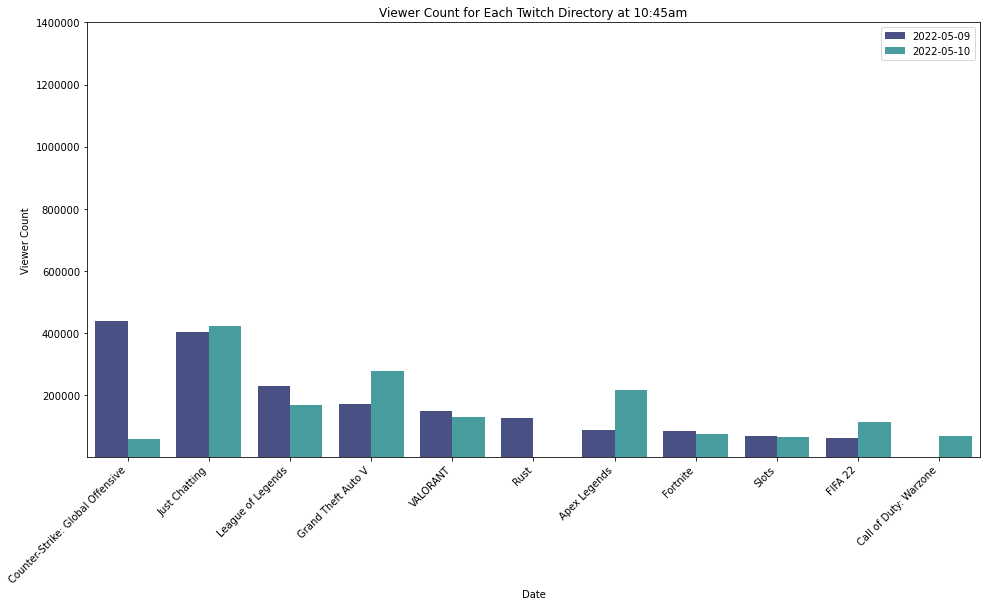

In [10]:
from matplotlib.ticker import FormatStrFormatter
plt.figure(figsize=(16,8))
ax = sns.barplot(x= new_week['Directory Name'], y=new_week['Viewer Count'], hue=new_week['Date'], palette='mako', ci=None)
plt.xticks(rotation=45,ha='right')
plt.title('Viewer Count for Each Twitch Directory at 10:45am')
plt.xlabel('Date')
plt.ylabel('Viewer Count')
plt.legend(loc=('upper right'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylim(1, 1400000)
plt.savefig(f'./graphs/Week{week_num}Day.png')
plt.show()

Current Weekly Summary

In [11]:
twitch_data.reset_index(inplace=True)
twitch_data

,Date,Time,Directory Name,Viewer Count
0,2022-01-31,10:45:52,Just Chatting,390431
1,2022-01-31,10:45:52,Grand Theft Auto V,239160
2,2022-01-31,10:45:52,League of Legends,219827
3,2022-01-31,10:45:52,VALORANT,137060
4,2022-01-31,10:45:52,Fortnite,115131
...,...,...,...,...
975,2022-05-10,17:46:17,FIFA 22,113501
976,2022-05-10,17:46:17,Fortnite,75010
977,2022-05-10,17:46:17,Call of Duty: Warzone,68566
978,2022-05-10,17:46:17,Counter-Strike: Global Offensive,58892


In [12]:
new_week['Date'] = pd.to_datetime(new_week['Date'])

<ipython-input-12-36bebabededa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_week['Date'] = pd.to_datetime(new_week['Date'])


In [13]:
max_group = new_week.groupby(['Directory Name']).resample('W-Sat', on='Date').max()
max_group = max_group.drop(columns=['Date', 'Directory Name']).reset_index()

Weekly avg viewership

In [14]:
mean_group = new_week.groupby(['Directory Name']).resample('W-Sat', on='Date').mean()
mean_group.reset_index(inplace=True)
mean_group

,Directory Name,Date,Viewer Count
0,Apex Legends,2022-05-14,151940.5
1,Call of Duty: Warzone,2022-05-14,68566.0
2,Counter-Strike: Global Offensive,2022-05-14,248316.5
3,FIFA 22,2022-05-14,88546.5
4,Fortnite,2022-05-14,79295.5
5,Grand Theft Auto V,2022-05-14,224352.5
6,Just Chatting,2022-05-14,412290.5
7,League of Legends,2022-05-14,198850.0
8,Rust,2022-05-14,126863.0
9,Slots,2022-05-14,67498.0


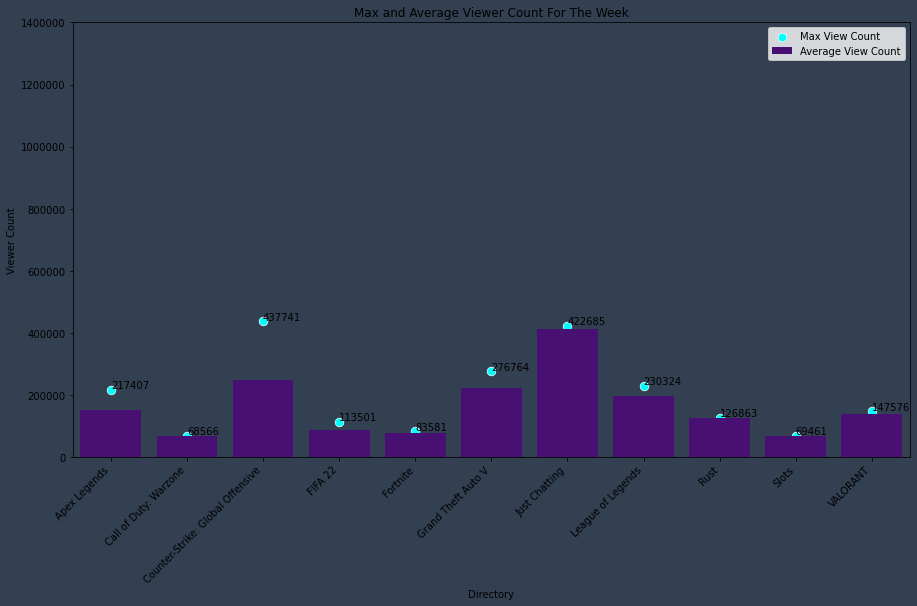

In [15]:
fig = plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=max_group['Directory Name'], y=max_group['Viewer Count'] , color='aqua',s=75,label='Max View Count')
sns.barplot(x=mean_group['Directory Name'], y=mean_group['Viewer Count'], color='indigo', label = 'Average View Count')
plt.xticks(rotation=45,ha='right')
a = pd.concat({'x': max_group['Directory Name'], 'y': max_group['Viewer Count'], 'val': max_group['Viewer Count']}, axis=1)
for i, point in a.iterrows():
    ax.text(point['x'], point['y']+4500, str(point['val']))

plt.title('Max and Average Viewer Count For The Week')
plt.xlabel('Directory')
plt.ylabel('Viewer Count')
ax.set_facecolor('#324052')
fig.set_facecolor('#324052')
plt.legend(loc=('upper right'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylim(0, 1400000)
plt.savefig(f'./graphs/Week{week_num}Summa.png')
plt.show()

All Time

In [16]:
total = twitch_data.groupby('Directory Name').max().reset_index().rename(columns={"Viewer Count" : 'Max Viewer Count'})
total['Average']  = twitch_data.groupby('Directory Name').mean().reset_index().rename(columns={'Viewer Count' : 'Average'})['Average']
total['Min'] = twitch_data.groupby('Directory Name').min().reset_index().rename(columns={'Viewer Count' : 'Min'})['Min']

total max and total average

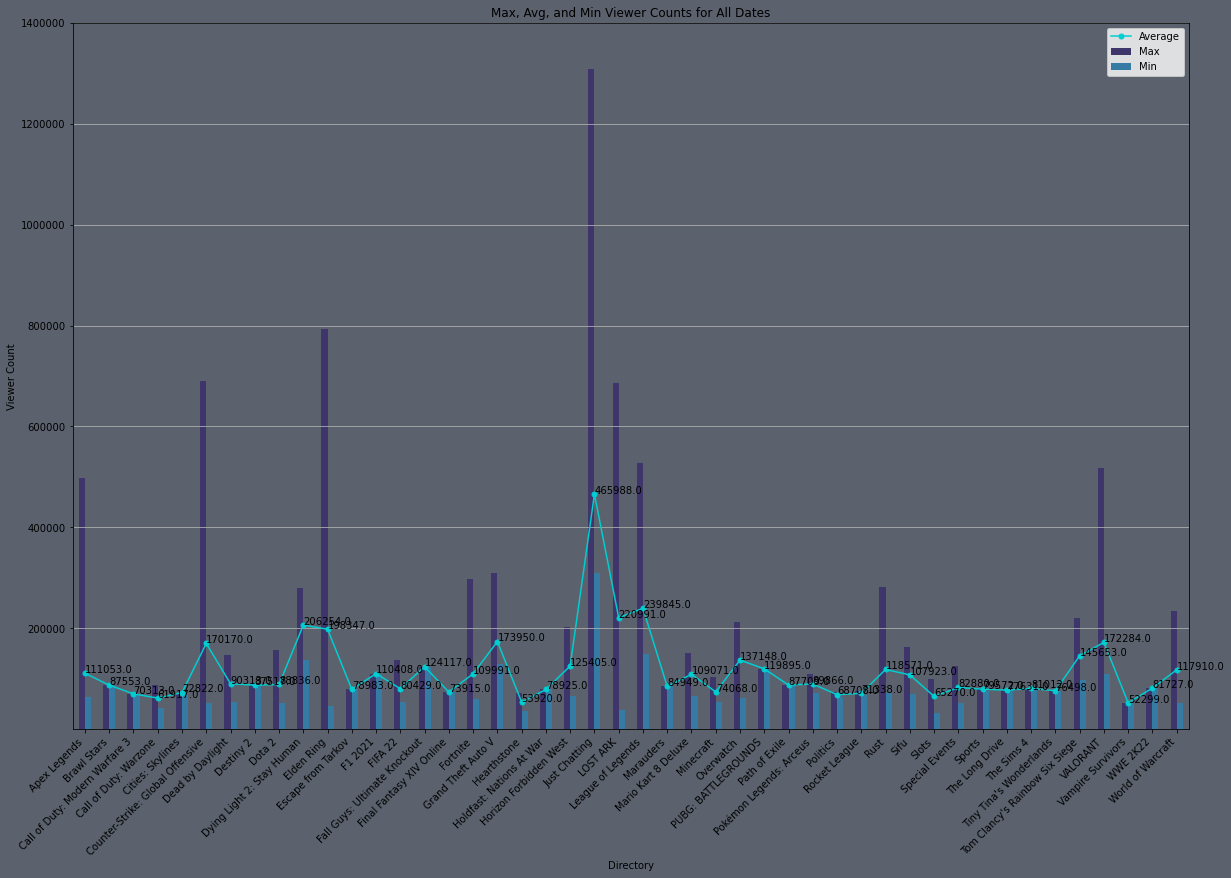

In [17]:
fig, ax = plt.subplots(figsize=(20,13))

fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')

cmap = sns.color_palette('mako', n_colors=3)

#####PANDAS PLOT######PANDAS PLOT######PANDAS PLOT######PANDAS PLOT######PANDAS PLOT######PANDAS PLOT######PANDAS PLOT
total.plot( x='Directory Name',ax=ax ,y=['Max Viewer Count', 'Min'],kind='bar', color=cmap, label=['Max', 'Min'])
total.plot(x='Directory Name', y='Average', kind='line', ax=ax, color='darkturquoise', label='Average', marker='.', ms=10)


plt.xticks(rotation=45,ha='right')
plt.title('Max, Avg, and Min Viewer Counts for All Dates')
plt.xlabel('Directory')
plt.ylabel('Viewer Count')

x=total['Directory Name']
y=  total['Average']
label='Average'

for i , g in enumerate(total['Average']):
    plt.text(i, g+1500, f'{np.round(g)}')
plt.legend()
plt.grid(axis='y')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.ylim(1, 1400000)
plt.savefig('./graphs/Total_all_weeks.png')
plt.show()